In [1]:
(* Generate the nodes for a Lagrange triangle of order N *)
genTrianglePts[n_] := Module[{base,i,j,r},
(
    base = Subdivide[0, 1, n];
    r = {};
    For[i = 1, i <= n + 1, i++,
        For[j = 1, j <= n + 2 - i, j++,
                AppendTo[r, {base[[j]], base[[i]]}];
            ];
    ];
    Return[r];
)];

1       2                  1    1  1    2  1       2    1  2
{{0, 0}, {-, 0}, {-, 0}, {1, 0}, {0, -}, {-, -}, {-, -}, {0, -}, {-, -}, {0, 1}}
          3       3                  3    3  3    3  3       3    3  3
-Graphics-
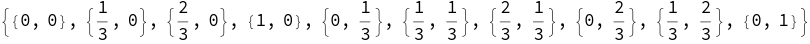
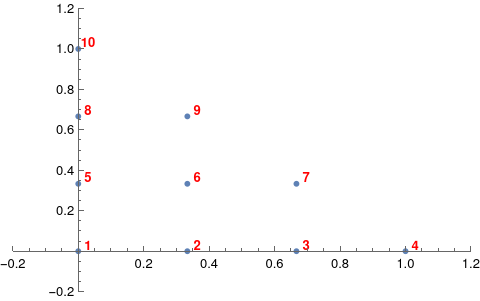

In [3]:
(* The standard triangle - used for plotting and integration *)
stdTri = Triangle[{{0,0},{0,1},{1,0}}];
(* The nodes for the cubic triangle *)
pts = genTrianglePts[3]
Show[ListPlot[pts, PlotRange -> {{-0.2,1.2}, {-0.2,1.2}}], Graphics[Table[Text[Style[ToString[i], Red, Bold], pts[[i]] + 0.03 ], {i, Length[pts]}]  ]]

In [8]:
(* Generate the polynomial basis of degree N *)
genStdBasis[n_] := Flatten[Table[Table[u^i * v^j, {j,0,n - i}], {i, 0, n}]];
stdBasis = genStdBasis[3]

2   3             2   2   2     3
{1, v, v , v , u, u v, u v , u , u  v, u }

1    0    0    0    0    0    0    0    0    0

                    1              1         1
                    -              -         --
1    0    0    0    3    0    0    9    0    27

                    2              4         8
                    -              -         --
1    0    0    0    3    0    0    9    0    27



1    0    0    0    1    0    0    1    0    1

     1    1    1
     -    -    --
1    3    9    27   0    0    0    0    0    0

     1    1    1    1    1    1    1    1    1
     -    -    --   -    -    --   -    --   --
1    3    9    27   3    9    27   9    27   27

     1    1    1    2    2    2    4    4    8
     -    -    --   -    -    --   -    --   --
1    3    9    27   3    9    27   9    27   27

     2    4    8
     -    -    --
1    3    9    27   0    0    0    0    0    0

     2    4    8    1    2    4    1    2    1
     -    -    --   -    -    --   -    --   --
1    3    9    27   3    9    27   9    27   27



1    1    1    1    0    0    0    0    0    0
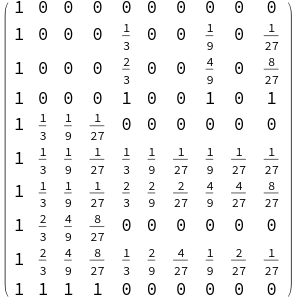

In [11]:
genH[pts_, basis_] := Table[basis /. {u -> pts[[i,1]], v -> pts[[i,2]]},{i,1,Length[pts]}];
h = genH[pts, stdBasis];
h // MatrixForm

3                       2                  2      3
    11 u      2   9 u    11 v            27 u  v      2   27 u v    9 v
1 - ---- + 9 u  - ---- - ---- + 18 u v - ------- + 9 v  - ------- - ----
     2             2      2                 2                2       2

          2       3                            2
      45 u    27 u    45 u v       2     27 u v
9 u - ----- + ----- - ------ + 27 u  v + -------
        2       2       2                   2

                   3               2
-9 u       2   27 u    9 u v   27 u  v
---- + 18 u  - ----- + ----- - -------
 2               2       2        2

       2      3
    9 u    9 u
u - ---- + ----
     2      2

                   2         2                 3
      45 u v   27 u  v   45 v          2   27 v
9 v - ------ + ------- - ----- + 27 u v  + -----
        2         2        2                 2



             2           2
27 u v - 27 u  v - 27 u v

             2
-9 u v   27 u  v
------ + -------
  2         2

                             2       3
-9 v   9 u v       2   27 u v    27 v
---- + ----- + 18 v  - ------- - -----
 2       2                2        2

               2
-9 u v   27 u v
------ + -------
  2         2

       2      3
    9 v    9 v
v - ---- + ----
     2      2
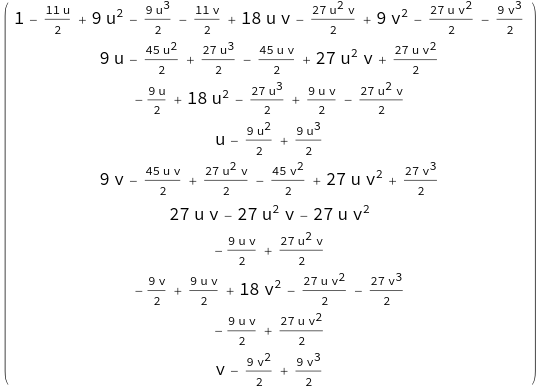

In [14]:
(* Find the basis functions *)
invH = Inverse[h];
psis = Transpose[invH] . stdBasis;
psi[i_, x_, y_] := psis[[i]] /. {u -> x, v -> y};
psis // MatrixForm
(*Check that it worked*)
(*Table[psis /. {u -> pts[[i,1]], v -> pts[[i,2]]}, {i,1,Length[psis]}] // MatrixForm*)

-Graphics3D-
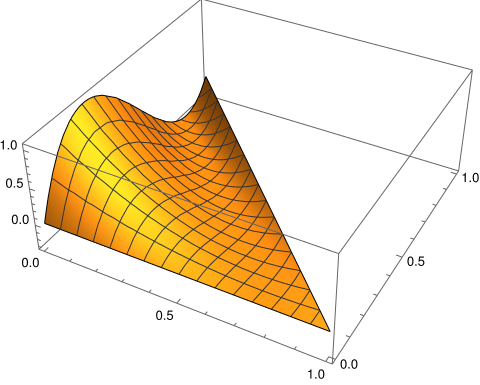

In [21]:
stdTri = Triangle[{{0,0},{0,1},{1,0}}];
Plot3D[psi[5, x, y], Element[{x,y}, stdTri], PlotRange->All]

In [23]:
(* Returns {x(u,v), y(u,v)} - isoparametric algorithm *)
getTransform[globalPts_] := Module[{xChange,yChange},
(
    xChange = Simplify[psis . Transpose[globalPts[[;;, 1]]]];
    yChange = Simplify[psis . Transpose[globalPts[[;;, 2]]]];
    Return[{xChange, yChange}];
)];

2                            2
{-1. + 3. v - 2.7 u  v + u (3. + 1.35 v - 1.35 v ), 
 
           2                                3                             2
>   -1. + u  (4.5 - 7.2 v) + 2.45 v - 0.45 v  + u (-4.5 + 11.25 v - 7.65 v )}
-Graphics-
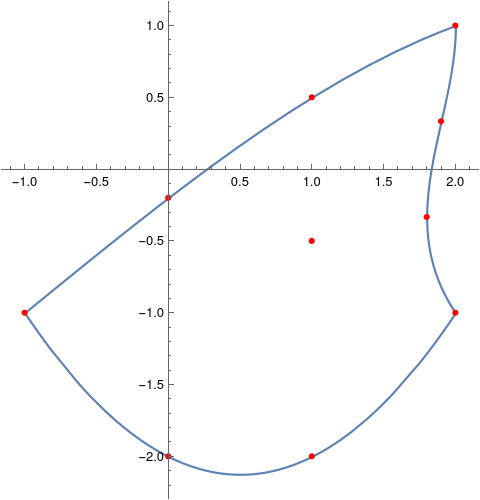

In [25]:
(* Demonstrate the transform *)
customPts = {{-1, -1}, {0, -2}, {1, -2}, {2, -1}, 
             {0, -0.2}, {1, -0.5}, {2, -1} * (2/3) + {2,1} * (1/3) + {-0.2, 0},
             {1, 0.5}, {2, -1} * (1/3) + {2,1} * (2/3) + {-0.1, 0},
             {2,1}};
trans = getTransform[customPts]
change[p_] := trans /. {u -> p[[1]], v -> p[[2]]};
stdB[t_] := Piecewise[{{{t, 0}, t <= 1}, {{2 -t, t - 1}, t >= 1 && t <= 2}, {{0, 3 - t}, t >= 2 && t <= 3}}]
Show[ParametricPlot[change[stdB[t]], {t,0,3}], ListPlot[customPts, PlotStyle->Red]]

In [31]:
(* Local mass matrix *)
lmm[globalPts_] := Module[{trans, J, dJ},
(
    trans = getTransform[globalPts];
    J = Transpose[{D[trans, u], D[trans, v]}];
    dJ = Simplify[Det[J]];
    Return[Integrate[KroneckerProduct[psis, psis] * dJ, Element[{u,v}, stdTri]]];
)];

In [33]:
m0 = lmm[customPts];

0.101997      0.0510801     -0.0208861    0.0127393     0.050836      0.0110418
 
>    0.0158896     -0.0220301    0.0103414     0.00977823

0.0510801     0.692969      -0.187971     0.00971627    0.30555       0.286968
 
>    -0.0921542    -0.160047     -0.0510502    0.0385205

-0.0208861    -0.187971     0.52705       0.00843239    -0.145503     0.116582
 
>    0.19653       -0.0215874    -0.104376     0.0199635

0.0127393     0.00971627    0.00843239    0.0596998     0.0336725     0.0307231
 
>    0.0142408     0.00925659    -0.00355252   0.00658403

0.050836      0.30555       -0.145503     0.0336725     0.539126      0.25788
 
>    -0.0521005    -0.16583      -0.0755096    0.0204949

0.0110418     0.286968      0.116582      0.0307231     0.25788       1.49899
 
>    0.0921391     0.00289286    0.00940179    0.0472058

0.0158896     -0.0921542    0.19653       0.0142408     -0.0521005    0.0921391
 
>    0.280061      -0.0722551    -0.113562     0.00767977

-0.0220301    -0.160047     -0.0215874    0.00925659    -0.16583      0.00289286
 
>    -0.0722551    0.33125       0.147765      -0.00979809

0.0103414     -0.0510502    -0.104376     -0.00355252   -0.0755096    0.00940179
 
>    -0.113562     0.147765      0.247423      -0.00267553

0.00977823    0.0385205     0.0199635     0.00658403    0.0204949     0.0472058
 
>    0.00767977    -0.00979809   -0.00267553   0.0379032
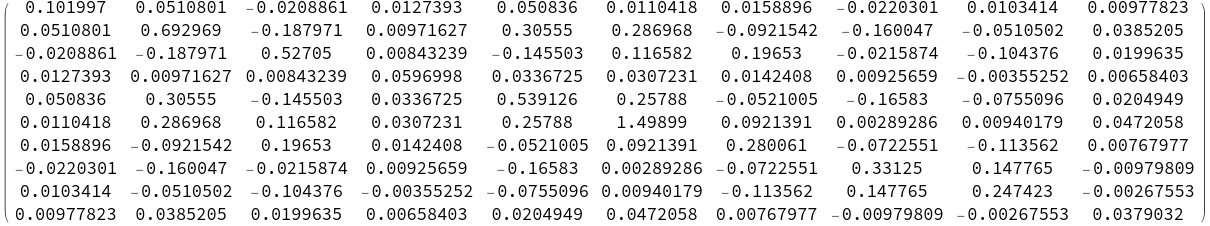

In [34]:
m0 // MatrixForm

In [35]:
(* Calculate the local mass matrix for a generic set of points *)
(* The output isn't very interpretable, so we leave this commented for better runtime *)
(* genericPts = {{x1,y1},{x2,y2},{x3,y3},{x4,y4},{x5,y5},{x6,y6},{x7,y7},{x8,y8},{x9,y9},{x10,y10}}; *)
(* m0g = lmm[genericPts]; *)
(* Not sensible *)
(* m0g[[1,2]] *)

2                       2
  11           27 u                    27 v
-(--) + 18 u - ----- + 18 v - 27 u v - -----
  2              2                       2
 
                        2                       2
       11           27 u                    27 v
     -(--) + 18 u - ----- + 18 v - 27 u v - -----
>      2              2                       2

               2                       2
           81 u    45 v            27 v
9 - 45 u + ----- - ---- + 54 u v + -----
             2      2                2
 

     -45 u       2
     ----- + 27 u  + 27 u v
>      2

                  2
  9           81 u    9 v
-(-) + 36 u - ----- + --- - 27 u v
  2             2      2
 
               2
     9 u   27 u
     --- - -----
>     2      2

              2
          27 u
1 - 9 u + -----
            2
 



>    0


-45 v                2
----- + 27 u v + 27 v
  2
 
                    2                       2
         45 u   27 u                    81 v
     9 - ---- + ----- - 45 v + 54 u v + -----
>         2       2                       2



                    2
27 v - 54 u v - 27 v
 


                2
>    27 u - 27 u  - 54 u v


-9 v
---- + 27 u v
 2
 
                2
     -9 u   27 u
     ---- + -----
>     2       2

          2
9 v   27 v
--- - -----
 2      2
 
                                      2
       9    9 u                   81 v
     -(-) + --- + 36 v - 27 u v - -----
>      2     2                      2

           2
-9 v   27 v
---- + -----
 2       2
 

     -9 u
     ---- + 27 u v
>     2




0
 
                   2
               27 v
     1 - 9 v + -----
>                2
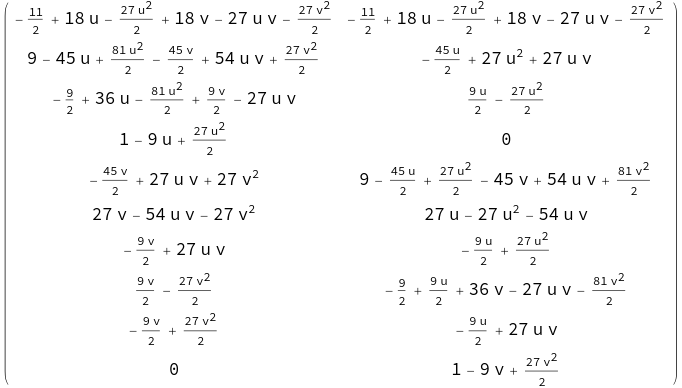

In [41]:
(* Gradients of basis functions *)
gpsi = Grad[psis, {u,v}];
gpsi // MatrixForm

In [44]:
(* Test Jacobi *)
(*t = getTransform[customPts];*)
(*J = Transpose[{D[trans, u], D[trans, v]}]*)
(*Simplify[Transpose[Inverse[J]] * Inverse[J] * Det[J]]*)

In [48]:
(* Local stiffness matrix *)
(* Very slow *)
lsm[globalPts_] := Module[{trans, J, dJ},
(
    trans = getTransform[globalPts];
    J = Transpose[{D[trans, u], D[trans, v]}];
    dJ = Simplify[Det[J]];
    JTJ = Transpose[Inverse[J]] . Inverse[J];
    Return[Integrate[gpsi . JTJ . Transpose[gpsi] * dJ, Element[{u,v}, stdTri]]];
)];
(* Local stiffness matrix (numeric, still slow, but faster) *)
lsmN[globalPts_] := Module[{trans, J, dJ},
(
    trans = getTransform[globalPts];
    J = Transpose[{D[trans, u], D[trans, v]}];
    dJ = Simplify[Det[J]];
    JTJ = Transpose[Inverse[J]] . Inverse[J];
    Return[NIntegrate[gpsi . JTJ . Transpose[gpsi] * dJ, Element[{u,v}, stdTri]]];
)];

0.798544     -0.53556     0.339033     -0.145165    -0.559778    -0.18482
 
>    0.0769709    0.434456     -0.0778302   -0.145851

-0.53556     2.36118      -1.29147     0.456264     -0.264532    -0.671271
 
>    -0.156574    -0.255454    0.274531     0.0828909

0.339033     -1.29147     3.04398      -0.881629    -0.179169    -1.40315
 
>    0.281864     0.176158     -0.164284    0.0786685

-0.145165    0.456264     -0.881629    1.54968      0.12662      -0.770813
 
>    -0.702299    0.0976909    0.366734     -0.0970808

-0.559778    -0.264532    -0.179169    0.12662      2.85575      -0.777248
 
>    0.0380935    -2.07945     0.247549     0.592168

-0.18482     -0.671271    -1.40315     -0.770813    -0.777248    6.75522
 
>    -0.23206     -0.260356    -1.94207     -0.513431

0.0769709    -0.156574    0.281864     -0.702299    0.0380935    -0.23206
 
>    1.94216      -0.0984128   -1.32635     0.176605

0.434456     -0.255454    0.176158     0.0976909    -2.07945     -0.260356    -0.09841\
 
>     28   3.85304      -0.510057    -1.35761

-0.0778302   0.274531     -0.164284    0.366734     0.247549     -1.94207
 
>    -1.32635     -0.510057    3.03449      0.0972852

-0.145851    0.0828909    0.0786685    -0.0970808   0.592168     -0.513431
 
>    0.176605     -1.35761     0.0972852    1.08636
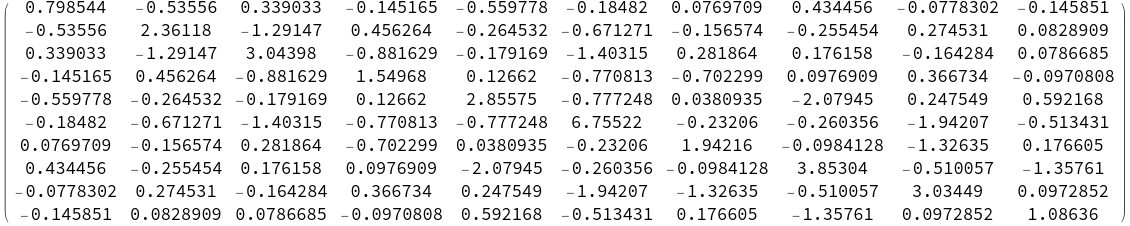

In [53]:
m1 = lsmN[customPts];
m1 // MatrixForm